# 1. Importing the libraries

In [65]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

# 2. Getting the Data


In [66]:
dataset = pd.read_csv('kun_wisman1.csv')
dataset.keys()

Index(['pintu_masuk', 'ganjil', 'genap'], dtype='object')

In [67]:
dataset.head()

,pintu_masuk,ganjil,genap
0,Soekarno-Hatta,1136150,1110287
1,Ngurah Rai,1710014,2021721
2,Kualanamu Int'.,110415,124309
3,Batam,705988,748092
4,Sam Ratulangi,8044,9235


# 3.Data Cleansing

In [68]:
dataset.drop('pintu_masuk',axis=1,inplace=True)

In [69]:
dataset.shape

(20, 2)

In [70]:
#konversi ke array
X = np.asarray(dataset)

In [71]:
# menentukan variabel yang akan diclusterkan 
dataset_x = dataset.iloc[:, :2]
dataset_x.head()

,ganjil,genap
0,1136150,1110287
1,1710014,2021721
2,110415,124309
3,705988,748092
4,8044,9235


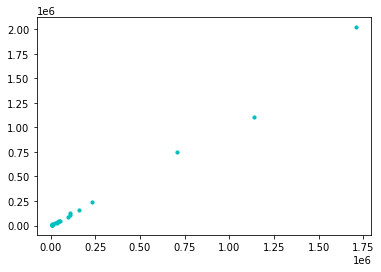

In [73]:
# visualisasi persebaran data
plt.scatter(dataset.ganjil, dataset.genap,s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [74]:
#Mengubah Variabel Data Frame Menjadi Array 
x_array =  np.array(dataset_x)
print(x_array)

[[1136150 1110287]
 [1710014 2021721]
 [ 110415  124309]
 [ 705988  748092]
 [   8044    9235]
 [ 110251  106942]
 [   9761   12703]
 [   6454    6457]
 [  24981   25215]
 [  34798   30143]
 [  49466   48206]
 [  33937   35944]
 [   7578    8135]
 [   6901    6255]
 [  13302   14080]
 [  46530   42626]
 [  97257   83135]
 [ 158186  162675]
 [  52088   48694]
 [ 229421  239005]]


# 4. KMeans

In [75]:
#Menstandarkan Ukuran Variabel
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[6.63138369e-01, 5.47780017e-01],
       [1.00000000e+00, 1.00000000e+00],
       [6.10257343e-02, 5.85740469e-02],
       [4.10630679e-01, 3.68072198e-01],
       [9.33339595e-04, 1.47856625e-03],
       [6.09294654e-02, 4.99571811e-02],
       [1.94122896e-03, 3.19926012e-03],
       [0.00000000e+00, 1.00224960e-04],
       [1.08754608e-02, 9.40725371e-03],
       [1.66380990e-02, 1.18523458e-02],
       [2.52483036e-02, 2.08145412e-02],
       [1.61326868e-02, 1.47305884e-02],
       [6.59794783e-04, 9.32786760e-04],
       [2.62391697e-04, 0.00000000e+00],
       [4.01981732e-03, 3.88247681e-03],
       [2.35248538e-02, 1.80459507e-02],
       [5.33019089e-02, 3.81450245e-02],
       [8.90675996e-02, 7.76098431e-02],
       [2.67874334e-02, 2.10566688e-02],
       [1.30882974e-01, 1.15481978e-01]])

In [76]:
# Menentukan dan mengkonfigurasi fungsi kmeans 
kmeans = KMeans(n_clusters = 3, random_state=123)
#Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [79]:
#Menampilkan pusat cluster 
print(kmeans.cluster_centers_)

[[0.03071948 0.02619228]
 [1.         1.        ]
 [0.53688452 0.45792611]]


In [80]:
#Menampilkan Hasil Kluster 
print(kmeans.labels_)
#Menambahkan Kolom "kluster" Dalam Data Frame Driver 
dataset["kluster"] = kmeans.labels_

[2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


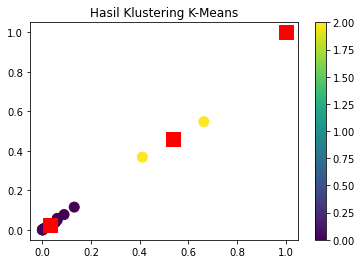

In [81]:
# Memvisualkan hasil kluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = dataset.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [91]:
print(davies_bouldin_score(X, kmeans.labels_)) 

0.26033204614213545


# 5. Hierarchical

In [82]:
#  Memanggil Library yang dibutuhkan 

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

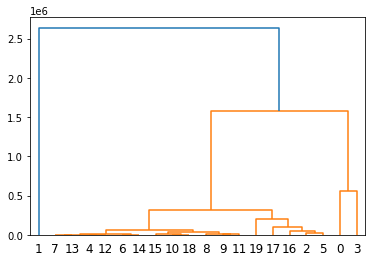

In [83]:
# Membentuk dendogram dengan metode complete 
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

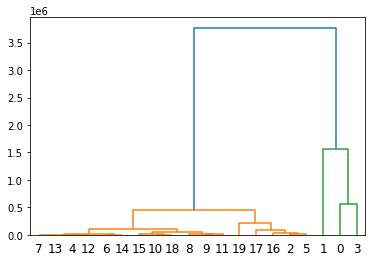

In [84]:
#  Membentuk dendogram dengan metode ward 
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [87]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

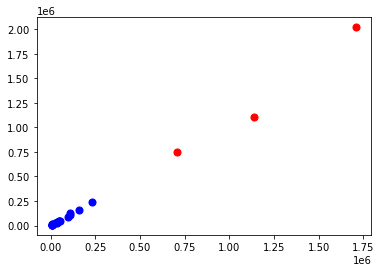

In [86]:
# Mengeplot Data setelah dilakukan hierarchical clustering
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

In [92]:
print(davies_bouldin_score(X, labels)) 

0.4033364447327529


Dari kedua metode diatas diperoleh :
1. Metode KMeans, menghasilkan 3 cluster dengan DB index = 0.26033204614213545
2. Metode Hierarchical, menghasilkan 2 cluster dengan DB index = 0.4033364447327529

Jumlah cluster terbaik ditunjukkan dengan nilai DB index yang semakin kecil. Dengan demikian, pada kasus ini metode Kmeans dengan 3 cluster lebih baik dibandingkan dengan metode Hierarchical.